In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from ipywidgets import interact_manual

In [2]:
x_data = pd.read_excel('taipei_running_data_x.xlsx')

In [3]:
y_data = pd.read_excel('taipei_running_data_y.xlsx')

In [4]:
print("x_data",x_data)
print("y_data",y_data)

x_data       土地移轉總面積(平方公尺)  工  住  商  其他  交易筆棟數_土地  交易筆棟數_建物  交易筆棟數_車位      移轉層次  \
0          0.039182  0  1  0   0  0.035714       0.1  0.166667  0.222222   
1          0.031495  0  1  0   0  0.071429       0.1  0.083333  0.305556   
2          0.027822  0  1  0   0  0.035714       0.1  0.083333  0.194444   
3          0.038581  0  0  1   0  0.035714       0.1  0.000000  0.333333   
4          0.019160  0  0  1   0  0.035714       0.1  0.000000  0.194444   
...             ... .. .. ..  ..       ...       ...       ...       ...   
8675       0.123999  0  1  0   0  0.035714       0.1  0.083333  0.138889   
8676       0.035054  0  0  1   0  0.071429       0.1  0.083333  0.527778   
8677       0.003803  0  0  1   0  0.035714       0.1  0.000000  0.416667   
8678       0.105976  0  1  0   0  0.071429       0.1  0.083333  0.444444   
8679       0.022752  0  0  1   0  0.071429       0.1  0.083333  0.416667   

          總樓層數  ...  其他.1  坡道平面  坡道機械  塔式車位  空格   交易標的橫坐標   交易標的縱坐標        屋齡  \

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

In [6]:
print("X_train",X_train)
print("y_train",y_train)
print("X_test",X_test)
print("y_test",y_test)

X_train       土地移轉總面積(平方公尺)  工  住  商  其他  交易筆棟數_土地  交易筆棟數_建物  交易筆棟數_車位      移轉層次  \
252        0.037590  0  1  0   0  0.071429       0.1  0.000000  0.250000   
1839       0.017292  0  0  1   0  0.035714       0.1  0.083333  0.555556   
718        0.028911  0  0  1   0  0.071429       0.1  0.083333  0.222222   
3667       0.039654  0  1  0   0  0.035714       0.1  0.166667  0.361111   
2883       0.007167  0  0  0   1  0.035714       0.1  0.000000  0.555556   
...             ... .. .. ..  ..       ...       ...       ...       ...   
4373       0.024572  0  1  0   0  0.035714       0.1  0.083333  0.472222   
7891       0.014171  0  1  0   0  0.107143       0.1  0.000000  0.305556   
4859       0.018657  0  0  1   0  0.035714       0.1  0.000000  0.277778   
3264       0.027319  0  1  0   0  0.035714       0.1  0.000000  0.277778   
2732       0.017357  0  0  1   0  0.035714       0.1  0.000000  0.194444   

          總樓層數  ...  其他.1  坡道平面  坡道機械  塔式車位  空格   交易標的橫坐標   交易標的縱坐標        屋齡  

In [7]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# For functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [113]:
model = Sequential()
# model.add(LSTM(50,dropout=0.2, input_shape(), return_sequence = True))
# model.add(LSTM(50,dropout=0.2, return_sequence = True))

# model.add(Flatten())

# model.add(Dense(256,input_dim=46,activation='relu'))
model.add(Dense(256,input_dim=46,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())

# model.add(Dense(128,activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(Dropout(0.2))
# model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(Dense(1,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.compile(loss='mean_absolute_percentage_error',optimizer='Adam')

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               12032     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 54,273
Trainable params: 53,761
Non-trainable params: 512
________________________________________________

In [115]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 50, verbose = 1, mode = 'auto') 

In [116]:
### 

In [117]:
history = model.fit(X_train,y_train,batch_size=128,epochs=500,validation_split = 0.25,callbacks = [early_stopping])

Epoch 1/500
39/39 [==============================] - 0s 6ms/step - loss: 99.9848 - val_loss: 99.9897
Epoch 2/500
39/39 [==============================] - 0s 5ms/step - loss: 99.7109 - val_loss: 99.7859
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 97.9494 - val_loss: 98.1540
Epoch 4/500
39/39 [==============================] - 0s 5ms/step - loss: 92.2441 - val_loss: 92.5317
Epoch 5/500
39/39 [==============================] - 0s 5ms/step - loss: 79.7053 - val_loss: 76.9021
Epoch 6/500
39/39 [==============================] - 0s 5ms/step - loss: 62.8967 - val_loss: 50.5688
Epoch 7/500
39/39 [==============================] - 0s 4ms/step - loss: 50.6462 - val_loss: 50.9674
Epoch 8/500
39/39 [==============================] - 0s 4ms/step - loss: 43.0036 - val_loss: 44.1861
Epoch 9/500
39/39 [==============================] - 0s 4ms/step - loss: 35.9480 - val_loss: 36.9056
Epoch 10/500
39/39 [==============================] - 0s 4ms/step - loss: 29.0444 - val_los

39/39 [==============================] - 0s 4ms/step - loss: 19.6823 - val_loss: 20.2314
Epoch 82/500
39/39 [==============================] - 0s 4ms/step - loss: 20.1336 - val_loss: 19.5442
Epoch 83/500
39/39 [==============================] - 0s 4ms/step - loss: 19.2723 - val_loss: 19.7881
Epoch 84/500
39/39 [==============================] - 0s 4ms/step - loss: 19.5782 - val_loss: 19.4249
Epoch 85/500
39/39 [==============================] - 0s 4ms/step - loss: 19.4600 - val_loss: 19.9886
Epoch 86/500
39/39 [==============================] - 0s 4ms/step - loss: 19.4438 - val_loss: 19.4117
Epoch 87/500
39/39 [==============================] - 0s 4ms/step - loss: 19.8126 - val_loss: 19.3977
Epoch 88/500
39/39 [==============================] - 0s 4ms/step - loss: 19.4475 - val_loss: 19.2905
Epoch 89/500
39/39 [==============================] - 0s 4ms/step - loss: 19.2818 - val_loss: 19.1976
Epoch 90/500
39/39 [==============================] - 0s 4ms/step - loss: 18.9548 - val_loss: 1

Epoch 161/500
39/39 [==============================] - 0s 4ms/step - loss: 17.8581 - val_loss: 18.4745
Epoch 162/500
39/39 [==============================] - 0s 4ms/step - loss: 17.9916 - val_loss: 18.3007
Epoch 163/500
39/39 [==============================] - 0s 3ms/step - loss: 17.4674 - val_loss: 18.4084
Epoch 164/500
39/39 [==============================] - 0s 3ms/step - loss: 18.0951 - val_loss: 18.5637
Epoch 165/500
39/39 [==============================] - 0s 4ms/step - loss: 17.6168 - val_loss: 18.4527
Epoch 166/500
39/39 [==============================] - 0s 4ms/step - loss: 17.6612 - val_loss: 18.5234
Epoch 167/500
39/39 [==============================] - 0s 4ms/step - loss: 17.4167 - val_loss: 18.7624
Epoch 168/500
39/39 [==============================] - 0s 4ms/step - loss: 17.5804 - val_loss: 18.0775
Epoch 169/500
39/39 [==============================] - 0s 4ms/step - loss: 17.8044 - val_loss: 18.3365
Epoch 170/500
39/39 [==============================] - 0s 4ms/step - loss

39/39 [==============================] - 0s 4ms/step - loss: 15.9691 - val_loss: 17.9284
Epoch 241/500
39/39 [==============================] - 0s 4ms/step - loss: 15.8870 - val_loss: 18.0788
Epoch 242/500
39/39 [==============================] - 0s 4ms/step - loss: 15.7253 - val_loss: 18.3462
Epoch 243/500
39/39 [==============================] - 0s 4ms/step - loss: 15.8155 - val_loss: 18.1068
Epoch 244/500
39/39 [==============================] - 0s 4ms/step - loss: 15.8334 - val_loss: 17.9142
Epoch 245/500
39/39 [==============================] - 0s 4ms/step - loss: 15.8194 - val_loss: 18.0992
Epoch 246/500
39/39 [==============================] - 0s 4ms/step - loss: 15.8372 - val_loss: 18.5291
Epoch 247/500
39/39 [==============================] - 0s 4ms/step - loss: 15.7241 - val_loss: 18.3003
Epoch 248/500
39/39 [==============================] - 0s 5ms/step - loss: 15.9205 - val_loss: 17.8618
Epoch 249/500
39/39 [==============================] - 0s 4ms/step - loss: 15.9324 - va

39/39 [==============================] - 0s 4ms/step - loss: 15.1011 - val_loss: 17.5713
Epoch 320/500
39/39 [==============================] - 0s 4ms/step - loss: 14.9052 - val_loss: 17.7233
Epoch 321/500
39/39 [==============================] - 0s 4ms/step - loss: 15.0493 - val_loss: 17.5115
Epoch 322/500
39/39 [==============================] - 0s 4ms/step - loss: 15.0522 - val_loss: 18.0183
Epoch 323/500
39/39 [==============================] - 0s 4ms/step - loss: 14.7538 - val_loss: 17.5786
Epoch 324/500
39/39 [==============================] - 0s 3ms/step - loss: 14.8739 - val_loss: 17.3097
Epoch 325/500
39/39 [==============================] - 0s 4ms/step - loss: 14.9622 - val_loss: 17.4147
Epoch 326/500
39/39 [==============================] - 0s 4ms/step - loss: 15.0454 - val_loss: 17.6433
Epoch 327/500
39/39 [==============================] - 0s 4ms/step - loss: 15.0148 - val_loss: 17.4249
Epoch 328/500
39/39 [==============================] - 0s 4ms/step - loss: 15.1149 - va

39/39 [==============================] - 0s 4ms/step - loss: 14.4204 - val_loss: 17.7068
Epoch 399/500
39/39 [==============================] - 0s 3ms/step - loss: 14.5710 - val_loss: 17.8831
Epoch 400/500
39/39 [==============================] - 0s 4ms/step - loss: 14.3406 - val_loss: 17.6040
Epoch 401/500
39/39 [==============================] - 0s 4ms/step - loss: 14.4333 - val_loss: 17.3946
Epoch 402/500
39/39 [==============================] - 0s 4ms/step - loss: 14.6313 - val_loss: 17.4468
Epoch 403/500
39/39 [==============================] - 0s 3ms/step - loss: 14.5169 - val_loss: 17.5236
Epoch 404/500
39/39 [==============================] - 0s 4ms/step - loss: 14.4268 - val_loss: 17.2068
Epoch 405/500
39/39 [==============================] - 0s 4ms/step - loss: 14.4004 - val_loss: 18.1986
Epoch 406/500
39/39 [==============================] - 0s 3ms/step - loss: 14.5621 - val_loss: 17.5826
Epoch 407/500
39/39 [==============================] - 0s 4ms/step - loss: 14.4708 - va

39/39 [==============================] - 0s 3ms/step - loss: 14.0644 - val_loss: 17.8835
Epoch 478/500
39/39 [==============================] - 0s 4ms/step - loss: 14.1087 - val_loss: 17.3106
Epoch 479/500
39/39 [==============================] - 0s 4ms/step - loss: 14.1410 - val_loss: 17.2625
Epoch 480/500
39/39 [==============================] - 0s 4ms/step - loss: 14.0901 - val_loss: 17.2146
Epoch 481/500
39/39 [==============================] - 0s 4ms/step - loss: 14.1204 - val_loss: 17.0637
Epoch 482/500
39/39 [==============================] - 0s 4ms/step - loss: 13.8761 - val_loss: 17.2341
Epoch 483/500
39/39 [==============================] - 0s 5ms/step - loss: 14.0478 - val_loss: 18.4701
Epoch 484/500
39/39 [==============================] - 0s 4ms/step - loss: 13.9635 - val_loss: 16.9535
Epoch 485/500
39/39 [==============================] - 0s 4ms/step - loss: 14.0668 - val_loss: 17.1146
Epoch 486/500
39/39 [==============================] - 0s 4ms/step - loss: 13.9785 - va

In [118]:
result = model.predict(X_test)
len(result)

2170

In [119]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [120]:
MAPE(y_test,result)

16.10599521516685

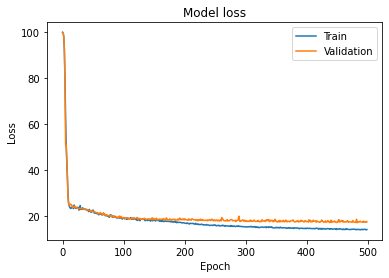

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [122]:
def hit_rate10(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    res = np.abs(y_true - y_pred)
    hit = []
    for i in res:
        for j in y_true:
            if i < 0.1 * j:
                hit.append(1)
            else:
                hit.append(0)
            break
    return sum(hit)/len(y_true)*100

In [123]:
def hit_rate20(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    res = np.abs(y_true - y_pred)
    hit = []
    for i in res:
        for j in y_true:
            if i < 0.2 * j:
                hit.append(1)
            else:
                hit.append(0)
            break
    return sum(hit)/len(y_true)*100

In [124]:
print(f"誤差在10%的命中率為: {hit_rate10(y_test,result)} %")
print(f"誤差在20%的命中率為: {hit_rate20(y_test,result)} %")

誤差在10%的命中率為: 59.907834101382484 %
誤差在20%的命中率為: 86.54377880184332 %
